# Laboratorio 7
### Oscar Fernando López Barrios
### Carné 20679

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
path = 'malimg_paper_dataset_imgs'

In [5]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [6]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [7]:
imgs, labels = next(familias)

In [8]:
imgs.shape

(9339, 64, 64, 3)

In [9]:
labels.shape

(9339, 25)

In [10]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

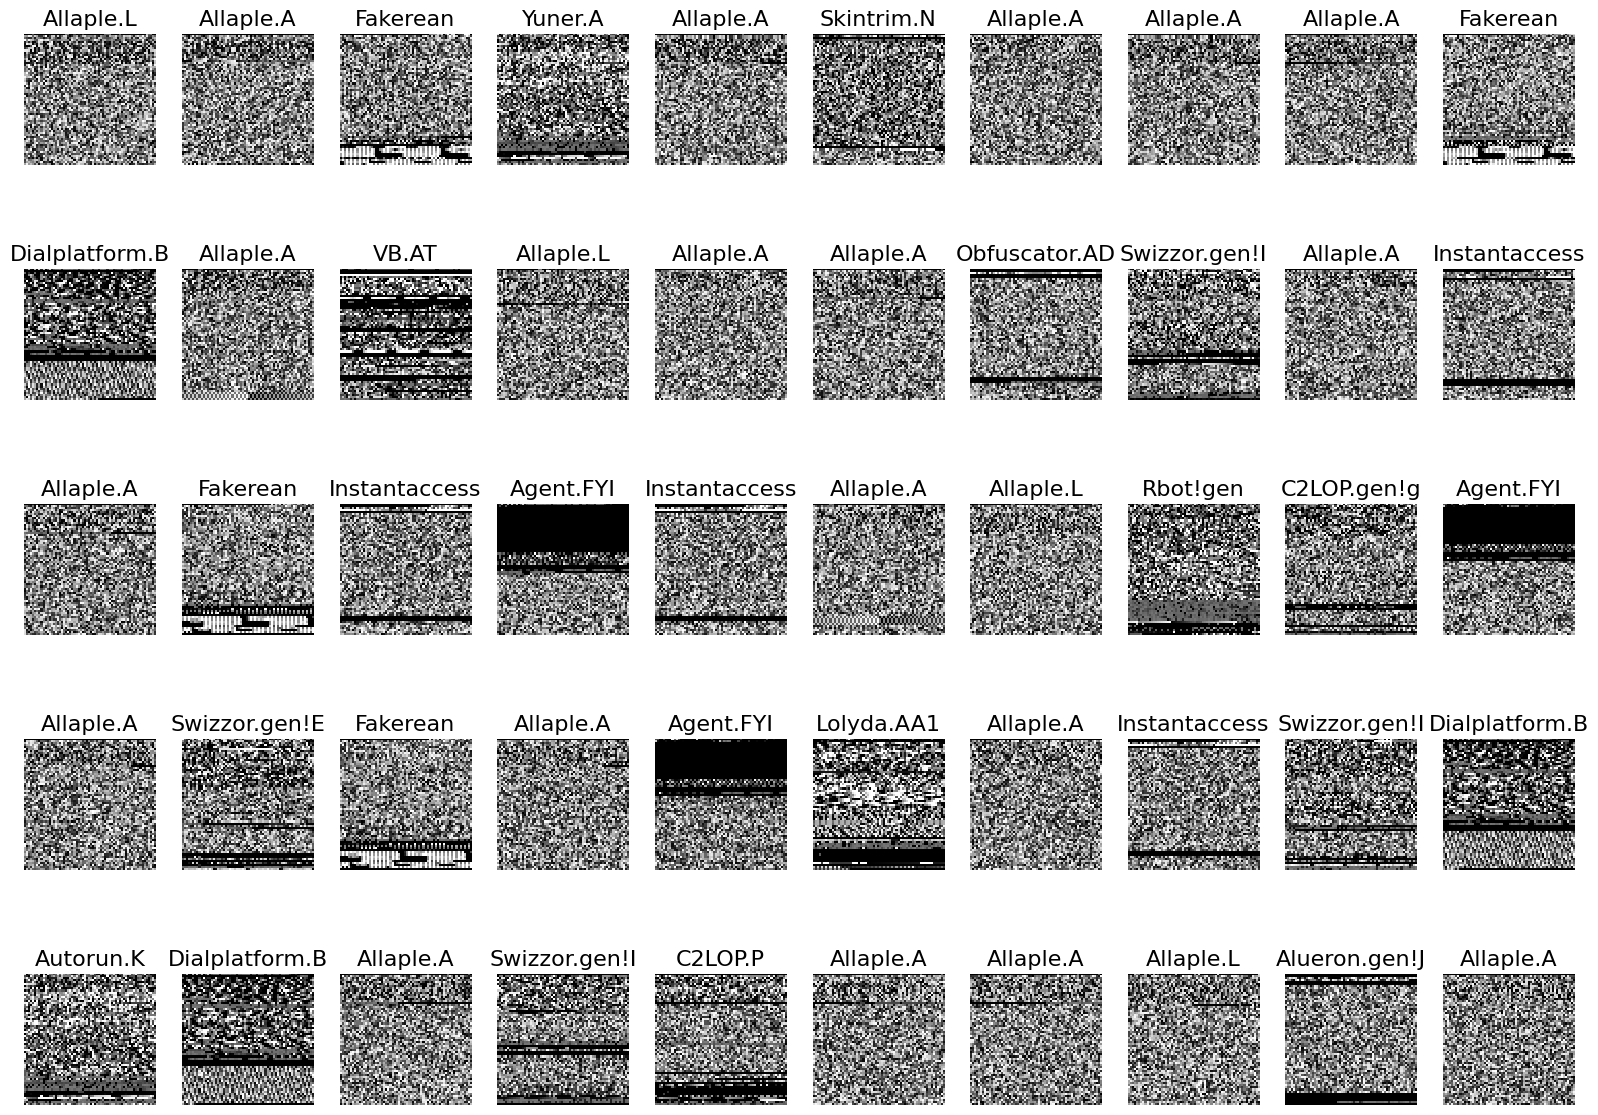

In [11]:
plots(imgs, titles = labels)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=42)
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy}')

model.save('modelo_lab_7.h5')

c:\Users\Fernando Lopez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4393 - loss: 43.5329 - val_accuracy: 0.8537 - val_loss: 0.5656
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9067 - loss: 0.3334 - val_accuracy: 0.9051 - val_loss: 0.3707
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9599 - loss: 0.1329 - val_accuracy: 0.9140 - val_loss: 0.3991
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9532 - loss: 0.1580 - val_accuracy: 0.9158 - val_loss: 0.3449
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9755 - loss: 0.0845 - val_accuracy: 0.9404 - val_loss: 0.2649
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9806 - loss: 0.0588 - val_accuracy: 0.9408 - val_loss: 0.3173
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9861 - loss: 0.0421 - val_accuracy: 0.9454 - val_loss: 0.2886
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9884 - loss: 0.0368 - val_acc


Test accuracy: 0.9482512474060059


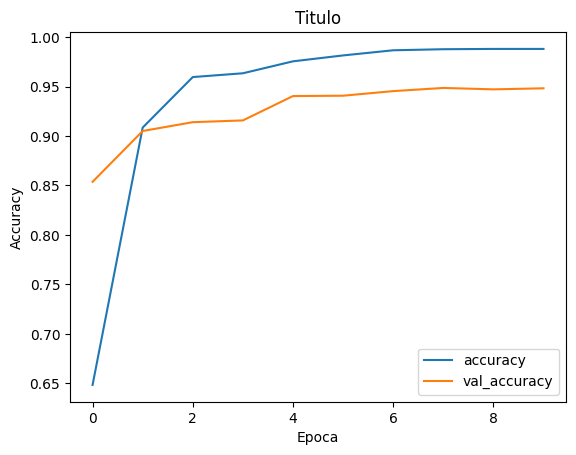

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.title('Titulo')
plt.legend(loc='lower right')
plt.show()